In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an census income data
https://archive.ics.uci.edu/ml/datasets/census+income


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 


Attribute Information:

Listing of attributes:

* The last column >50K, <=50K is the target variable indicating whether the people earn less than or larger than 50K per year

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### However, I have modified the dataset and so you will need to load the dataset by reading a csv file I provided. In particular, I changed 50K to 80K just to reflect the inflation 

In [4]:
df = pd.read_csv("adult_income_modified.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=80K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=80K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=80K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=80K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=80K


### Your task is to build a model that can predict whether a people will earn <= 80K or > 80K

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped at 20 points for the whole final project



### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


First change the target variable salary to 0 and 1

In [5]:
df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


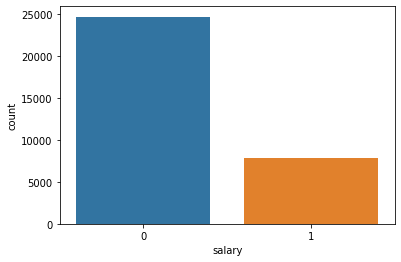

In [6]:
sns.countplot(df['salary'])

### Good Luck !!!

Show all your work below

In [7]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

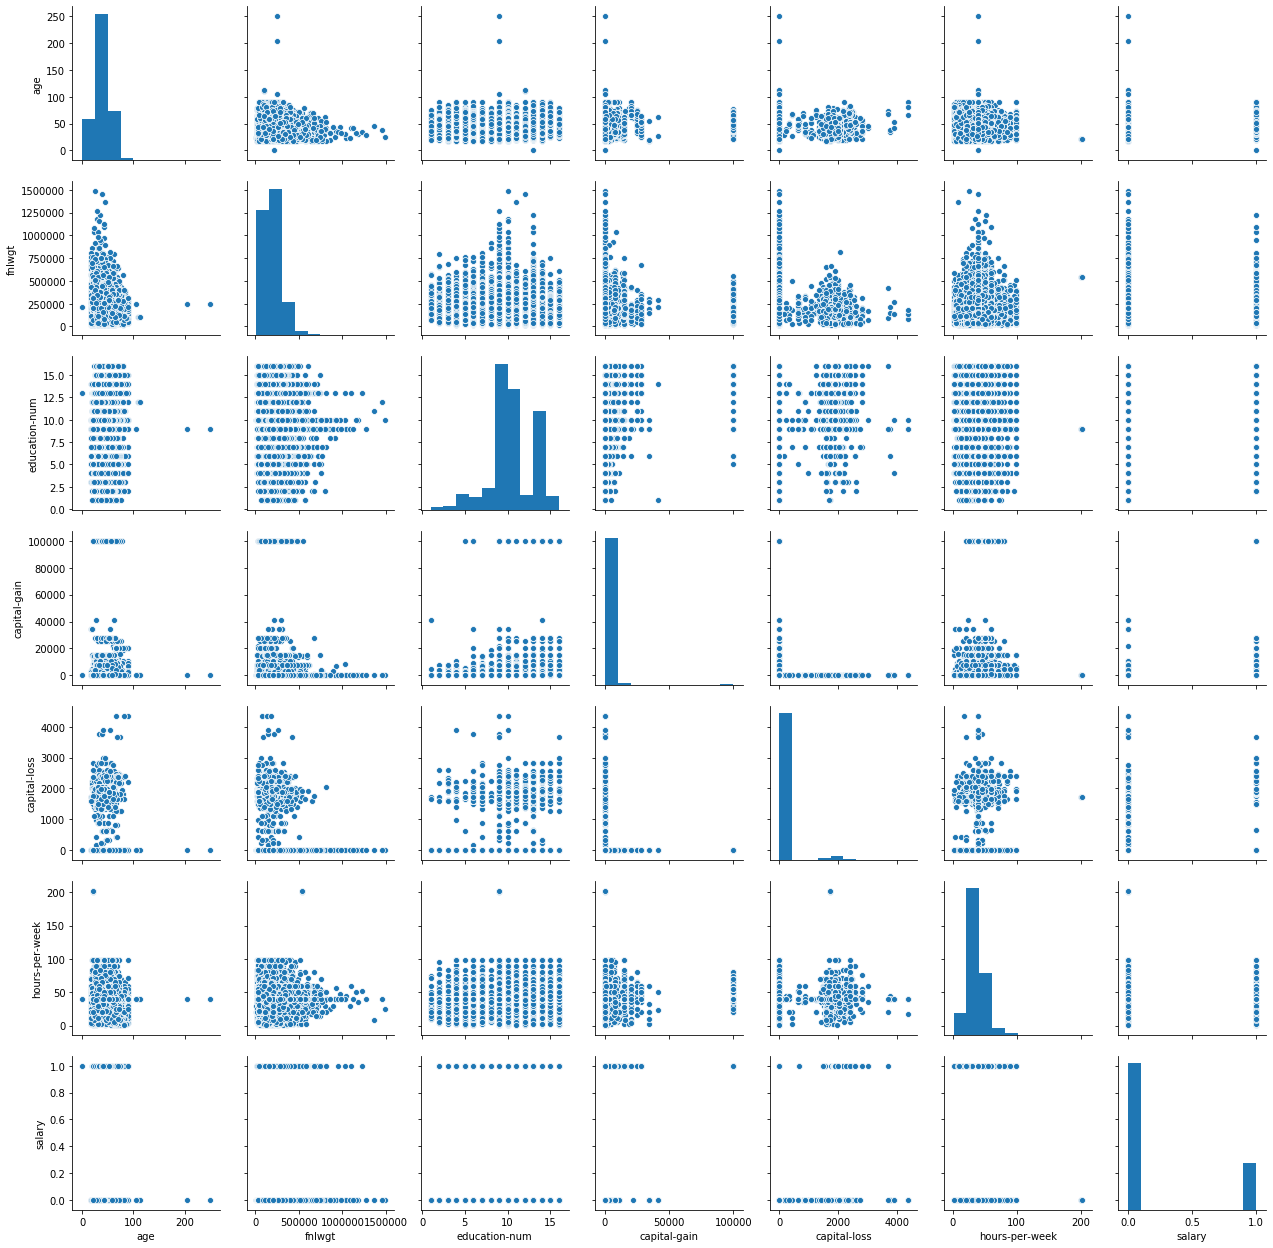

In [8]:
sns.pairplot(df)

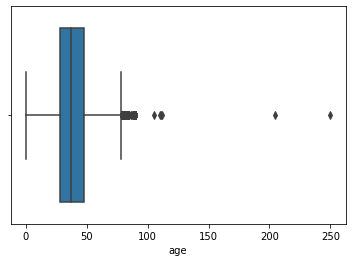

In [9]:
sns.boxplot(x='age', data=df)

In [10]:
df = df[ df['age'] <= 100]

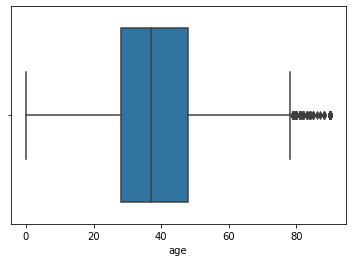

In [11]:
sns.boxplot(x='age', data=df)

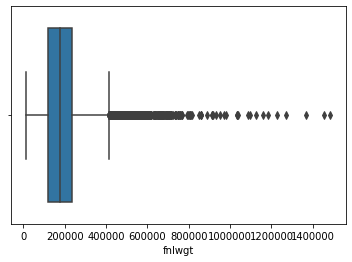

In [12]:
sns.boxplot(x='fnlwgt', data=df)

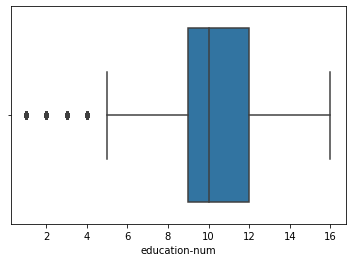

In [13]:
sns.boxplot(x='education-num', data=df)

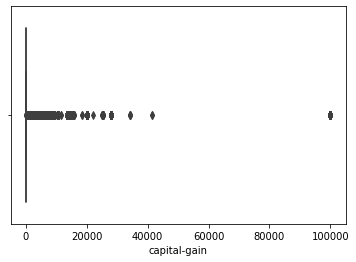

In [14]:
sns.boxplot(x='capital-gain', data=df)

In [15]:
df = df[ df['capital-gain'] <= 60000]

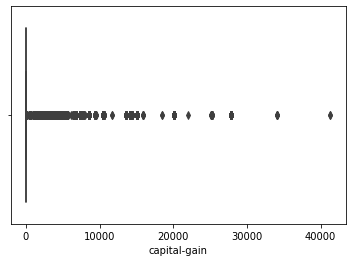

In [16]:
sns.boxplot(x='capital-gain', data=df)

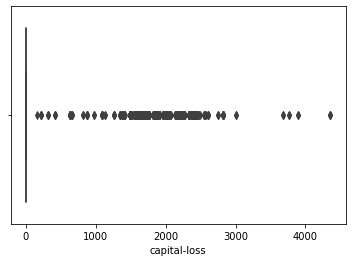

In [17]:
sns.boxplot(x='capital-loss', data=df)

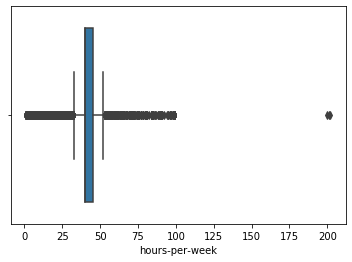

In [18]:
sns.boxplot(x='hours-per-week', data=df)

In [19]:
df = df[ df['hours-per-week'] <= 125]

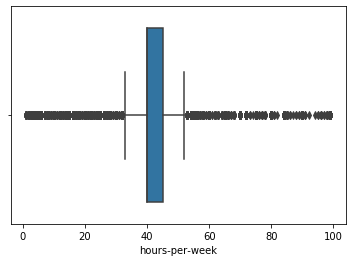

In [20]:
sns.boxplot(x='hours-per-week', data=df)

In [21]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,-0.076930,0.033196,0.116524,0.058537,0.067744,0.231210
fnlwgt,-0.076930,1.000000,-0.043611,-0.004508,-0.010246,-0.019548,-0.009809
education-num,0.033196,-0.043611,1.000000,0.145725,0.081524,0.143837,0.329863
capital-gain,0.116524,-0.004508,0.145725,1.000000,-0.050245,0.082952,0.310701
capital-loss,0.058537,-0.010246,0.081524,-0.050245,1.000000,0.055284,0.153605
hours-per-week,0.067744,-0.019548,0.143837,0.082952,0.055284,1.000000,0.225693
salary,0.231210,-0.009809,0.329863,0.310701,0.153605,0.225693,1.000000


In [22]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [23]:
workclass = pd.get_dummies(df['workclass'],drop_first=True)
education = pd.get_dummies(df['education'],drop_first=True)
marital_status = pd.get_dummies(df['marital-status'],drop_first=True)
occupation = pd.get_dummies(df['occupation'],drop_first=True)
relationship = pd.get_dummies(df['relationship'],drop_first=True)
race = pd.get_dummies(df['race'],drop_first=True)
sex = pd.get_dummies(df['sex'],drop_first=True)
native_country = pd.get_dummies(df['native-country'],drop_first=True)

In [24]:
df2 = pd.concat([workclass, df['salary']], axis=1)
df2.corr()

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,salary
Federal-gov,1.000000,-0.045833,-0.002567,-0.265436,-0.032428,-0.050627,-0.035661,-0.003631,0.061063
Local-gov,-0.045833,1.000000,-0.003858,-0.398893,-0.048732,-0.076081,-0.053590,-0.005456,0.034553
Never-worked,-0.002567,-0.003858,1.000000,-0.022342,-0.002730,-0.004261,-0.003002,-0.000306,-0.008195
Private,-0.265436,-0.398893,-0.022342,1.000000,-0.282228,-0.440615,-0.310361,-0.031600,-0.076005
Self-emp-inc,-0.032428,-0.048732,-0.002730,-0.282228,1.000000,-0.053829,-0.037916,-0.003861,0.133372
Self-emp-not-inc,-0.050627,-0.076081,-0.004261,-0.440615,-0.053829,1.000000,-0.059195,-0.006027,0.026967
State-gov,-0.035661,-0.053590,-0.003002,-0.310361,-0.037916,-0.059195,1.000000,-0.004245,0.016462
Without-pay,-0.003631,-0.005456,-0.000306,-0.031600,-0.003861,-0.006027,-0.004245,1.000000,-0.011591
salary,0.061063,0.034553,-0.008195,-0.076005,0.133372,0.026967,0.016462,-0.011591,1.000000


In [25]:
df3 = pd.concat([education, df['salary']], axis=1)
df3.corr()

,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,salary
11th,1.000000,-0.022575,-0.014004,-0.019766,-0.027666,-0.024602,-0.035776,-0.040927,-0.085923,-0.021714,-0.134096,-0.045715,-0.007702,-0.025013,-0.104391,-0.084851
12th,-0.022575,1.000000,-0.008402,-0.011859,-0.016599,-0.014761,-0.021465,-0.024555,-0.051551,-0.013027,-0.080453,-0.027427,-0.004621,-0.015007,-0.062631,-0.044026
1st-4th,-0.014004,-0.008402,1.000000,-0.007356,-0.010296,-0.009156,-0.013315,-0.015232,-0.031978,-0.008081,-0.049907,-0.017014,-0.002866,-0.009309,-0.038851,-0.034185
5th-6th,-0.019766,-0.011859,-0.007356,1.000000,-0.014533,-0.012924,-0.018794,-0.021500,-0.045137,-0.011407,-0.070444,-0.024015,-0.004046,-0.013140,-0.054839,-0.045297
7th-8th,-0.027666,-0.016599,-0.010296,-0.014533,1.000000,-0.018090,-0.026305,-0.030093,-0.063177,-0.015965,-0.098598,-0.033613,-0.005663,-0.018392,-0.076756,-0.058749
9th,-0.024602,-0.014761,-0.009156,-0.012924,-0.018090,1.000000,-0.023393,-0.026760,-0.056182,-0.014198,-0.087680,-0.029891,-0.005036,-0.016355,-0.068257,-0.055595
Assoc-acdm,-0.035776,-0.021465,-0.013315,-0.018794,-0.026305,-0.023393,1.000000,-0.038915,-0.081698,-0.020646,-0.127503,-0.043467,-0.007323,-0.023784,-0.099258,0.004574
Assoc-voc,-0.040927,-0.024555,-0.015232,-0.021500,-0.030093,-0.026760,-0.038915,1.000000,-0.093460,-0.023618,-0.145858,-0.049724,-0.008377,-0.027207,-0.113547,0.011694
Bachelors,-0.085923,-0.051551,-0.031978,-0.045137,-0.063177,-0.056182,-0.081698,-0.093460,1.000000,-0.049585,-0.306219,-0.104393,-0.017587,-0.057120,-0.238384,0.180430
Doctorate,-0.021714,-0.013027,-0.008081,-0.011407,-0.015965,-0.014198,-0.020646,-0.023618,-0.049585,1.000000,-0.077384,-0.026381,-0.004444,-0.014435,-0.060242,0.130561


In [43]:
marital_status_plus_salary = pd.concat([marital_status, df['salary']], axis=1)
marital_status_plus_salary.corr()

,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,salary
Married-AF-spouse,1.000000,-0.024506,-0.003043,-0.018676,-0.004812,-0.004736,0.012387
Married-civ-spouse,-0.024506,1.000000,-0.104988,-0.644325,-0.166021,-0.163406,0.442898
Married-spouse-absent,-0.003043,-0.104988,1.000000,-0.080009,-0.020616,-0.020291,-0.042409
Never-married,-0.018676,-0.644325,-0.080009,1.000000,-0.126521,-0.124528,-0.316699
Separated,-0.004812,-0.166021,-0.020616,-0.126521,1.000000,-0.032087,-0.074100
Widowed,-0.004736,-0.163406,-0.020291,-0.124528,-0.032087,1.000000,-0.063692
salary,0.012387,0.442898,-0.042409,-0.316699,-0.074100,-0.063692,1.000000


In [27]:
df5 = pd.concat([occupation, df['salary']], axis=1)
df5.corr()

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,salary
Adm-clerical,1.000000,-0.006043,-0.137808,-0.136514,-0.064493,-0.076143,-0.093008,-0.121933,-0.024640,-0.137461,-0.051788,-0.128668,-0.062250,-0.082516,-0.088653
Armed-Forces,-0.006043,1.000000,-0.006336,-0.006277,-0.002965,-0.003501,-0.004276,-0.005606,-0.001133,-0.006320,-0.002381,-0.005916,-0.002862,-0.003794,-0.004938
Craft-repair,-0.137808,-0.006336,1.000000,-0.143140,-0.067623,-0.079838,-0.097522,-0.127851,-0.025836,-0.144133,-0.054301,-0.134913,-0.065271,-0.086521,-0.010707
Exec-managerial,-0.136514,-0.006277,-0.143140,1.000000,-0.066988,-0.079088,-0.096606,-0.126650,-0.025594,-0.142779,-0.053791,-0.133645,-0.064658,-0.085708,0.213836
Farming-fishing,-0.064493,-0.002965,-0.067623,-0.066988,1.000000,-0.037364,-0.045639,-0.059833,-0.012091,-0.067453,-0.025413,-0.063138,-0.030546,-0.040491,-0.050784
Handlers-cleaners,-0.076143,-0.003501,-0.079838,-0.079088,-0.037364,1.000000,-0.053883,-0.070641,-0.014275,-0.079637,-0.030003,-0.074543,-0.036064,-0.047805,-0.086430
Machine-op-inspct,-0.093008,-0.004276,-0.097522,-0.096606,-0.045639,-0.053883,1.000000,-0.086287,-0.017437,-0.097276,-0.036648,-0.091053,-0.044052,-0.058393,-0.067964
Other-service,-0.121933,-0.005606,-0.127851,-0.126650,-0.059833,-0.070641,-0.086287,1.000000,-0.022860,-0.127529,-0.048046,-0.119371,-0.057752,-0.076554,-0.155086
Priv-house-serv,-0.024640,-0.001133,-0.025836,-0.025594,-0.012091,-0.014275,-0.017437,-0.022860,1.000000,-0.025771,-0.009709,-0.024123,-0.011671,-0.015470,-0.036819
Prof-specialty,-0.137461,-0.006320,-0.144133,-0.142779,-0.067453,-0.079637,-0.097276,-0.127529,-0.025771,1.000000,-0.054165,-0.134573,-0.065107,-0.086303,0.180856


In [28]:
df6 = pd.concat([relationship, df['salary']], axis=1)
df6.corr()

,Not-in-family,Other-relative,Own-child,Unmarried,Wife,salary
Not-in-family,1.000000,-0.103552,-0.252289,-0.202041,-0.131670,-0.187831
Other-relative,-0.103552,1.000000,-0.076063,-0.060914,-0.039697,-0.082836
Own-child,-0.252289,-0.076063,1.000000,-0.148407,-0.096717,-0.227006
Unmarried,-0.202041,-0.060914,-0.148407,1.000000,-0.077454,-0.141798
Wife,-0.131670,-0.039697,-0.096717,-0.077454,1.000000,0.123775
salary,-0.187831,-0.082836,-0.227006,-0.141798,0.123775,1.000000


In [29]:
df7 = pd.concat([race, df['salary']], axis=1)
df7.corr()

,Asian-Pac-Islander,Black,Other,White,salary
Asian-Pac-Islander,1.000000,-0.059083,-0.016570,-0.438264,0.009111
Black,-0.059083,1.000000,-0.029849,-0.789498,-0.088363
Other,-0.016570,-0.029849,1.000000,-0.221415,-0.032614
White,-0.438264,-0.789498,-0.221415,1.000000,0.085435
salary,0.009111,-0.088363,-0.032614,0.085435,1.000000


In [30]:
df8 = pd.concat([sex, df['salary']], axis=1)
df8.corr()

,Male,salary
Male,1.000000,0.214476
salary,0.214476,1.000000


In [31]:
df9 = pd.concat([native_country, df['salary']], axis=1)
df9.corr()

,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,salary
Cambodia,1.000000,-0.001477,-0.001167,-0.001035,-0.001313,-0.001119,-0.000712,-0.001388,-0.001278,-0.000725,...,-0.001439,-0.000466,-0.001197,-0.000952,-0.000571,-0.000587,-0.071049,-0.001103,-0.000538,0.007479
Canada,-0.001477,1.000000,-0.002937,-0.002604,-0.003306,-0.002816,-0.001793,-0.003493,-0.003218,-0.001825,...,-0.003623,-0.001173,-0.003014,-0.002397,-0.001437,-0.001477,-0.178833,-0.002775,-0.001355,0.011405
China,-0.001167,-0.002937,1.000000,-0.002057,-0.002612,-0.002225,-0.001416,-0.002759,-0.002542,-0.001442,...,-0.002862,-0.000927,-0.002381,-0.001894,-0.001136,-0.001167,-0.141281,-0.002192,-0.001071,0.003348
Columbia,-0.001035,-0.002604,-0.002057,1.000000,-0.002316,-0.001973,-0.001256,-0.002447,-0.002254,-0.001278,...,-0.002538,-0.000822,-0.002111,-0.001679,-0.001007,-0.001035,-0.125277,-0.001944,-0.000949,-0.020406
Cuba,-0.001313,-0.003306,-0.002612,-0.002316,1.000000,-0.002505,-0.001595,-0.003107,-0.002862,-0.001623,...,-0.003222,-0.001044,-0.002681,-0.002132,-0.001278,-0.001313,-0.159056,-0.002468,-0.001205,0.003321
Dominican-Republic,-0.001119,-0.002816,-0.002225,-0.001973,-0.002505,1.000000,-0.001359,-0.002646,-0.002438,-0.001383,...,-0.002745,-0.000889,-0.002284,-0.001816,-0.001089,-0.001119,-0.135500,-0.002103,-0.001027,-0.024179
Ecuador,-0.000712,-0.001793,-0.001416,-0.001256,-0.001595,-0.001359,1.000000,-0.001685,-0.001552,-0.000880,...,-0.001747,-0.000566,-0.001454,-0.001156,-0.000693,-0.000712,-0.086262,-0.001339,-0.000654,-0.006517
El-Salvador,-0.001388,-0.003493,-0.002759,-0.002447,-0.003107,-0.002646,-0.001685,1.000000,-0.003023,-0.001715,...,-0.003404,-0.001103,-0.002832,-0.002252,-0.001351,-0.001388,-0.168041,-0.002608,-0.001273,-0.020502
England,-0.001278,-0.003218,-0.002542,-0.002254,-0.002862,-0.002438,-0.001552,-0.003023,1.000000,-0.001580,...,-0.003136,-0.001016,-0.002609,-0.002075,-0.001244,-0.001278,-0.154802,-0.002402,-0.001173,0.011940
France,-0.000725,-0.001825,-0.001442,-0.001278,-0.001623,-0.001383,-0.000880,-0.001715,-0.001580,1.000000,...,-0.001778,-0.000576,-0.001480,-0.001177,-0.000706,-0.000725,-0.087790,-0.001362,-0.000665,0.012434


In [44]:
Xarray = df['education-num'].values
Yarray = df['salary'].values

In [45]:
X = Xarray.reshape(-1, 1)
Y = Yarray.reshape(-1, 1)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(0.7 * df.shape[0])

(25922, 1)
(6481, 1)
(25922, 1)
(6481, 1)
22682.1


In [53]:
model1 = LinearRegression()
model1.fit(X_train, Y_train)
print(model1.intercept_)
print(model1.coef_)

[-0.312789]
[[0.05465339]]


In [54]:
Y_pred = model1.predict(X_test)

In [55]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Root Mean Squared Error: 0.4026680349722659
R-squared: 0.10695217147759262


In [48]:
import random
for i in range(10):
    print(random.randint(1, 1000))

470
969
187
55
694
735
267
133
978
360


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

Trial 0, R-squared: 0.09666988147281452,  Slope: [[0.0553418]], Intercept: [-0.32129282],  
Trial 1, R-squared: 0.10953256286969892,  Slope: [[0.05486711]], Intercept: [-0.31461636],  
Trial 2, R-squared: 0.0972961728127667,  Slope: [[0.05530432]], Intercept: [-0.32138109],  
Trial 3, R-squared: 0.11066730112262269,  Slope: [[0.0546253]], Intercept: [-0.31300188],  
Trial 4, R-squared: 0.10757618142770065,  Slope: [[0.05448316]], Intercept: [-0.31292969],  
Trial 5, R-squared: 0.11357629920503975,  Slope: [[0.05449315]], Intercept: [-0.31271768],  
Trial 6, R-squared: 0.11056516988903298,  Slope: [[0.05458355]], Intercept: [-0.31054396],  
Trial 7, R-squared: 0.10038926060501363,  Slope: [[0.05496865]], Intercept: [-0.31785892],  
Trial 8, R-squared: 0.11422394071106168,  Slope: [[0.05412605]], Intercept: [-0.30827039],  
Trial 9, R-squared: 0.11230721897546014,  Slope: [[0.0545567]], Intercept: [-0.31087493],  


In [56]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,0.106766
1,1,0.109854
2,2,0.107896
3,3,0.114944
4,4,0.109701
5,5,0.113190
6,6,0.106991
7,7,0.110920
8,8,0.105094
9,9,0.105291


In [57]:
X_train, X_test, y_train, y_test = train_test_split(marital_status_plus_salary.drop('salary',axis=1), 
                                                    marital_status_plus_salary['salary'], test_size=0.20, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4912
           1       0.00      0.00      0.00      1569

    accuracy                           0.76      6481
   macro avg       0.38      0.50      0.43      6481
weighted avg       0.57      0.76      0.65      6481

0.7579077302885358


In [58]:
train = pd.concat([marital_status_plus_salary, df['education-num'], df['capital-gain']], axis=1)
train.head()

,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,salary,education-num,capital-gain
0,0,0,0,1,0,0,0,13,2174
1,0,1,0,0,0,0,0,13,0
2,0,0,0,0,0,0,0,9,0
3,0,1,0,0,0,0,0,7,0
4,0,1,0,0,0,0,0,13,0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('salary',axis=1), 
                                                    train['salary'], test_size=0.20, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4912
           1       0.76      0.53      0.63      1569

    accuracy                           0.85      6481
   macro avg       0.81      0.74      0.77      6481
weighted avg       0.84      0.85      0.84      6481

0.8466286066964974


In [60]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('salary',axis=1), 
                                                    train['salary'], test_size=0.20, 
                                                    random_state=101)

In [61]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[4719  193]
 [ 751  818]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4912
           1       0.81      0.52      0.63      1569

    accuracy                           0.85      6481
   macro avg       0.84      0.74      0.77      6481
weighted avg       0.85      0.85      0.84      6481

0.8543434655145811


In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4912
           1       0.81      0.52      0.63      1569

    accuracy                           0.85      6481
   macro avg       0.84      0.74      0.77      6481
weighted avg       0.85      0.85      0.84      6481

0.8543434655145811


it seemed that marital status (Married-civ-spouse) had the most correlation to salary at .44. so i tried using logistic regression on that table which yeilded a .76 accuracy score. i also tried to see if the next 2 highest correlation factors, which were education-num and capital-gain had any affect on the model. So I created train with all 3 factors and used logistic regression and decision tree models and found that adding two more factors raised the accuracy score. I also validated my model using a random forrest which yielded a similar result. i also tried adding multiple categories and found that it only raised the accuracy score marginally so i kept the number of categories relatively small.